<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/Ch_06_%EB%82%B4%EC%A0%81_Inner_Product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 6. 내적과 차원의 축소**

## **6.1 내적과 선형변환**
### 코사인 유사성(Cosine Similarity)

<img src = 'https://substackcdn.com/image/fetch/w_1456,c_limit,f_webp,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F9b7020f2-925d-4d5c-8ea2-83b461f68fae_1483x1000.png' width=600 height=400>


### **Norm은 원점(0,0)으로 부터 L2 거리(유클리디언 거리)**

$$
\|a\| = \sqrt{3^2 + 4^2} = \sqrt{9 + 16} = \sqrt{25} = 5
$$



In [ ]:
import numpy as np

# 두 벡터 정의
vector_a = np.array([3, 4])  # 벡터 a
vector_b = np.array([6, 8])  # 벡터 b

# 두 벡터의 내적 계산
dot_product = np.dot(vector_a, vector_b)

# 벡터 크기(노름) 계산
magnitude_a = np.linalg.norm(vector_a)
magnitude_b = np.linalg.norm(vector_b)

# 코사인 유사성 계산
cosine_similarity = dot_product / (magnitude_a * magnitude_b)

# 결과 출력
print(f"벡터 a: {vector_a}")
print(f"벡터 b: {vector_b}")
print(f"두 벡터의 내적: {dot_product}")
print(f"벡터 a의 크기: {magnitude_a}")
print(f"벡터 b의 크기: {magnitude_b}")
print(f"코사인 유사성: {cosine_similarity}")

벡터 a: [3 4]
벡터 b: [6 8]
두 벡터의 내적: 50
벡터 a의 크기: 5.0
벡터 b의 크기: 10.0
코사인 유사성: 1.0


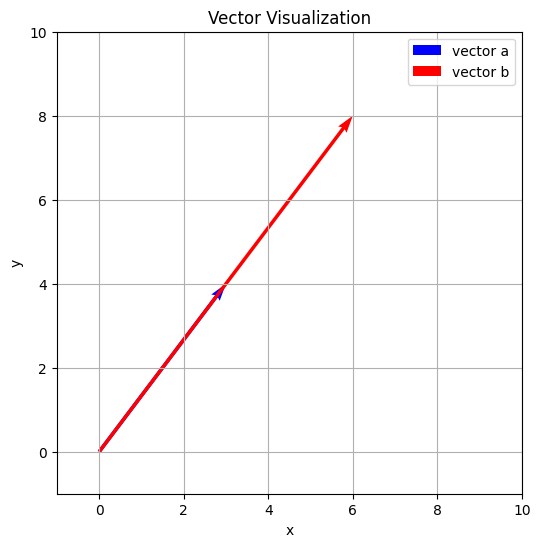

In [ ]:
# prompt: 시각화해줘

import matplotlib.pyplot as plt

# 벡터 시각화
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, vector_a[0], vector_a[1], angles='xy', scale_units='xy', scale=1, color='blue', label='vector a')
plt.quiver(0, 0, vector_b[0], vector_b[1], angles='xy', scale_units='xy', scale=1, color='red', label='vector b')

# 축 설정
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vector Visualization')
plt.grid(True)
plt.legend()

# 플롯 표시
plt.show()


### **가중평균치 계산은 내적의 한 종류**

In [ ]:
# 0부터 100까지의 정수에서 10 by 3 행렬을 생성
matrix_10x3 = np.random.randint(50, 101, size=(10, 3))
print(matrix_10x3)

# 3 by 1 행렬 정의
matrix_3x1 = np.array([1/3, 1/3, 1/3])  # 동일 비중의 가중평균치
print(matrix_3x1)

# 두 행렬의 내적 계산
dot_product = np.dot(matrix_10x3, matrix_3x1)
dot_product

[[ 51  89  67]
 [ 77  93  75]
 [ 90  58  55]
 [ 98  60  74]
 [ 65  80  96]
 [ 98  88  82]
 [ 80  99  57]
 [ 70  78  64]
 [ 84  88 100]
 [ 96  83  54]]
[0.33333333 0.33333333 0.33333333]


array([69.        , 81.66666667, 67.66666667, 77.33333333, 80.33333333,
       89.33333333, 78.66666667, 70.66666667, 90.66666667, 77.66666667])

### **벡터에 행렬을 내적하면 같은 차원 혹은 다른 차원으로 좌표이동하게 된다**

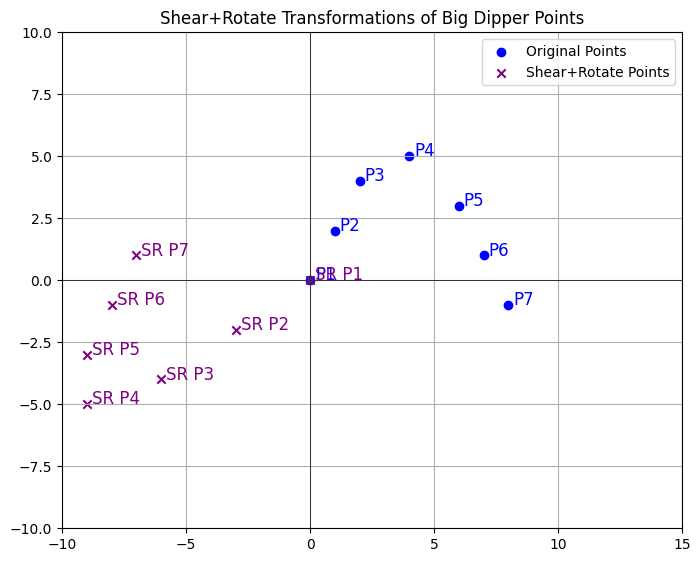

In [ ]:
# 북두칠성 모양을 대략적으로 나타내는 7개의 임의의 점 정의
big_dipper_points = np.array([
    [0, 0],   # Alkaid
    [1, 2],   # Mizar
    [2, 4],   # Alioth
    [4, 5],   # Megrez
    [6, 3],   # Phecda
    [7, 1],   # Dubhe
    [8, -1]   # Merak
])

# Shear 행렬 생성 (x축 기준)
shear_matrix = np.array([[1, 1], [0, 1]])

# Shear + Rotate 행렬 생성 (x축으로 shear 후 45도 회전)
theta = np.pi / 1  # 180도
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])
shear_rotate_matrix = np.dot(rotation_matrix, shear_matrix)

# Shear + Rotate 변환 적용
shear_rotate_dipper_points = np.dot(big_dipper_points, shear_rotate_matrix.T)

# 원래 점과 변환된 점들을 시각화
plt.figure(figsize=(8, 8))

# 원래 점들 (북두칠성 모양)
plt.scatter(big_dipper_points[:, 0], big_dipper_points[:, 1], color='blue', label='Original Points')
for i, point in enumerate(big_dipper_points):
    plt.text(point[0] + 0.2, point[1], f'P{i+1}', fontsize=12, color='blue')

# Shear + Rotate 변환된 점들
plt.scatter(shear_rotate_dipper_points[:, 0], shear_rotate_dipper_points[:, 1], color='purple', label='Shear+Rotate Points', marker='x')
for i, point in enumerate(shear_rotate_dipper_points):
    plt.text(point[0] + 0.2, point[1], f'SR P{i+1}', fontsize=12, color='purple')

# 설정
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim(-10, 15)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title('Shear+Rotate Transformations of Big Dipper Points')
plt.grid(True)

# 그래프 출력
plt.show()


<img src= "https://algebra1course.wordpress.com/wp-content/uploads/2013/02/slide10.jpg" width = 500>

## **6.2 내적과 커널함수(Kernel Transformation)**
- 커널 함수(Kernel Function)는 기계 학습, 특히 서포트 벡터 머신(SVM)에서 데이터의 차원을 증가시켜 비선형 데이터를 선형적으로 분리 가능하게 만드는 데 사용되는 중요한 개념
- 커널 변환(Kernel Transformation)을 통해 데이터를 고차원 특징 공간으로 매핑하여 더 복잡한 데이터 패턴을 학습
- Suppodt Vector Machine의 핵심 개념

Text(0.5, 1.0, 'Problem')

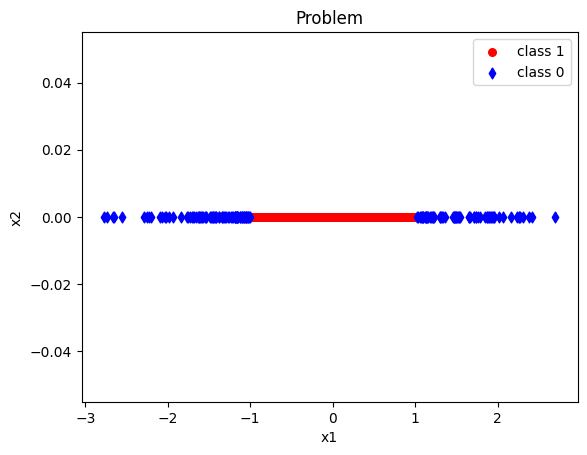

In [ ]:
np.random.seed(0)
X = np.random.randn(500)
tr = 1
X_pos = X[np.logical_and(X<tr, X>-tr)]
X_neg = X[np.logical_or(X>=tr, X<=-tr)]
plt.scatter(X_pos, y=X_pos*0, c='r', marker='o', label='class 1', s=30)
plt.scatter(X_neg, y=X_neg*0, c='b', marker='d', label='class 0', s=30)
plt.legend(); plt.xlabel('x1'); plt.ylabel('x2'); plt.title('Problem')

### 원래 행렬식 및 커널 변환된 행렬식 표현

#### 원래 행렬식 (Original Matrix)
- **입력 행렬 $X$ (n by 1)**: 각 요소는 샘플 하나의 값으로 구성됩니다.
  - $X = \begin{bmatrix} x_0 \\ x_1 \\ \vdots \\ x_{n} \end{bmatrix}$
- **레이블 벡터 $y$**: 각 요소는 해당 샘플의 레이블(클래스)을 나타냅니다.
  - $y = \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n \end{bmatrix}$

#### 커널 변환된 행렬식 (Kernel Transformed Matrix)
- **변환된 입력 행렬 $\Phi(X)$ (n by 2)**: 원래 입력 값 $x$를 $\phi_1$와 $\phi_2$로 변환한 형태입니다.
  - $\Phi(X) = \begin{bmatrix} x_0 & x_0^2 \\ x_1 & x_1^2 \\ \vdots & \vdots \\ x_n & x_n^2 \end{bmatrix}$

이렇게 커널 변환된 행렬식을 통해 원래의 1차원 데이터가 더 높은 차원에서 표현되며, 이를 활용해 더 복잡한 비선형 문제를 선형적으로 해결할 수 있습니다.

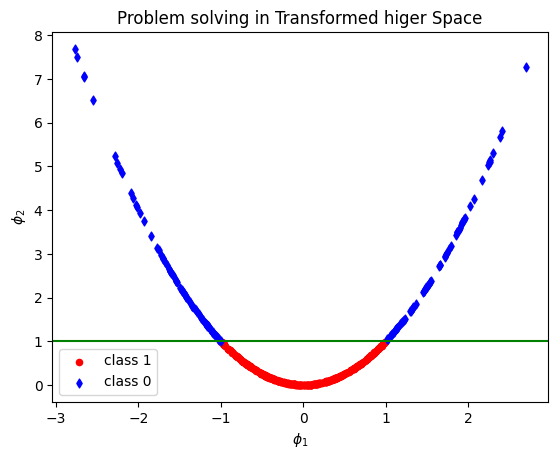

In [ ]:
plt.scatter(X_pos, y=X_pos**2, c='r', marker='o', label='class 1', s=20)
plt.scatter(X_neg, y=X_neg**2, c='b', marker='d', label='class 0', s=20)
plt.legend(); plt.xlabel(r'$\phi_1$'); plt.ylabel(r'$\phi_2$')
plt.title('Problem solving in Transformed higer Space')
plt.axhline(y= tr, color='g', linestyle='-')

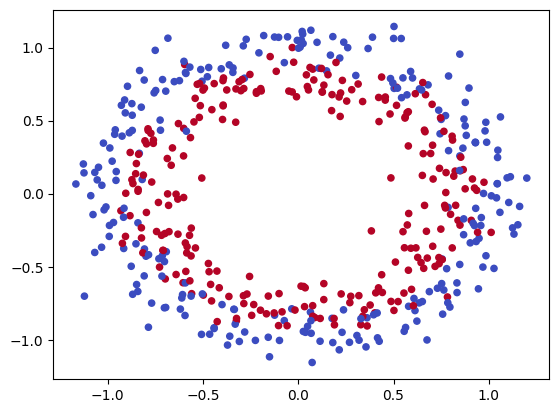

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, random_state=11, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm');

In [ ]:
X.shape

(500, 2)

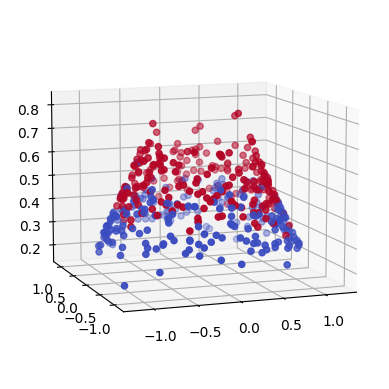

In [ ]:
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, cmap='coolwarm')
ax.view_init(10, 250)

#### 코드 설명을 Matrix 형태로 표현

- **입력 행렬 $X$**: 각 행은 샘플 하나를 나타내며, 각 열은 해당 샘플의 특징입니다.
  - $X = \begin{bmatrix} x_{0,0} & x_{0,1} \\ x_{1,0} & x_{1,1} \\ \vdots & \vdots \\ x_{n,0} & x_{n,1} \end{bmatrix}$

- **레이블 벡터 $y$**: 각 요소는 해당 샘플의 레이블(클래스)을 나타냅니다.
  - $y = \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n \end{bmatrix}$

- **은닉 표현 $r$**: 각 샘플에 대해 $r = \exp\left(-\sum_{i=0}^{1} x_i^2 \right)$로 계산된 값입니다.
  - $r = \begin{bmatrix} r_0 \\ r_1 \\ \vdots \\ r_n \end{bmatrix}$

- **새로운 커널 행렬 $X'$ (n by 3)**: 입력 행렬 $X$를 변형하여 세 번째 열에 은닉 표현 $r$을 추가한 형태입니다.
  - $X' = \begin{bmatrix} x_{0,0} & x_{0,1} & r_0 \\ x_{1,0} & x_{1,1} & r_1 \\ \vdots & \vdots & \vdots \\ x_{n,0} & x_{n,1} & r_n \end{bmatrix}$

이렇게 생성된 데이터를 사용해 2D 및 3D에서의 분포를 시각화할 수 있습니다. 3D 시각화에서는 은닉 표현 $r$을 축으로 사용하여 입력 데이터의 비선형 특성을 강조할 수 있습니다.



## **6.3 내적과 단순회귀분석, 다중회귀분석, 인공신경망의 이해**


In [ ]:
!pip install mglearn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 14.4 MB/s eta 0:00:00


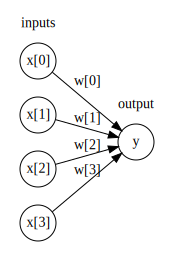

In [ ]:
import mglearn

mglearn.plot_nn_graphs.plot_logistic_regression_graph()

## **입력변수가 4개이고 출력변수가 1개인 인공신경망의 선형 모델 수식**

- 입력 값 $x$와 가중치 $w$를 사용하여 출력 $y$를 계산하는 선형 모델은 다음과 같이 표현됩니다.

$$
y = w[0] \cdot x[0] + w[1] \cdot x[1] + w[2] \cdot x[2] + w[3] \cdot x[3]
$$

또는 벡터화된 형태로 표현하면,

$$
y = \sum_{i=0}^{3} w[i] \cdot x[i]
$$

여기서,
- $x[i]$는 $i$-번째 입력 값입니다.
- $w[i]$는 $i$-번째 가중치입니다.


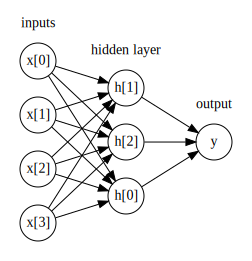

In [ ]:
mglearn.plot_nn_graphs.plot_single_hidden_layer_graph()

## 다층 신경망 수식

입력 값 $x$와 은닉층의 가중치 $w_1$, 은닉층의 출력 값 $h$와 출력층의 가중치 $w_2$를 사용하여 출력 $y$를 계산하는 다층 신경망 모델은 다음과 같이 표현됩니다.

### 은닉층 출력 계산

은닉층 노드 $h[0], h[1], h[2]$는 입력 값과 가중치 $w_1$에 의해 계산됩니다.

$$
h[0] = w_1[0,0] \cdot x[0] + w_1[0,1] \cdot x[1] + w_1[0,2] \cdot x[2] + w_1[0,3] \cdot x[3]
$$

$$
h[1] = w_1[1,0] \cdot x[0] + w_1[1,1] \cdot x[1] + w_1[1,2] \cdot x[2] + w_1[1,3] \cdot x[3]
$$

$$
h[2] = w_1[2,0] \cdot x[0] + w_1[2,1] \cdot x[1] + w_1[2,2] \cdot x[2] + w_1[2,3] \cdot x[3]
$$

### 출력층 계산

출력 값 $y$는 은닉층 출력 값 $h$와 가중치 $w_2$를 사용하여 계산됩니다.

$$
y = w_2[0] \cdot h[0] + w_2[1] \cdot h[1] + w_2[2] \cdot h[2]
$$

여기서,
- $x[i]$는 $i$-번째 입력 값입니다.
- $w_1[i,j]$는 $i$-번째 은닉층 노드와 $j$-번째 입력 값을 연결하는 가중치입니다.
- $h[i]$는 $i$-번째 은닉층 노드의 출력 값입니다.
- $w_2[i]$는 $i$-번째 은닉층 노드와 출력 노드 $y$를 연결하는 가중치입니다.


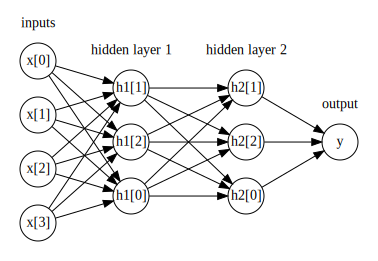

In [ ]:
mglearn.plot_nn_graphs.plot_two_hidden_layer_graph()

## 다층 신경망 수식

입력 값 $x$와 첫 번째 은닉층의 가중치 $w_1$, 두 번째 은닉층의 가중치 $w_2$, 그리고 출력층의 가중치 $w_3$를 사용하여 출력 $y$를 계산하는 다층 신경망 모델은 다음과 같이 표현됩니다.

### 첫 번째 은닉층 출력 계산

첫 번째 은닉층 노드 $h1[0], h1[1], h1[2]$는 입력 값과 가중치 $w_1$에 의해 계산됩니다.

$$
h1[0] = w_1[0,0] \cdot x[0] + w_1[0,1] \cdot x[1] + w_1[0,2] \cdot x[2] + w_1[0,3] \cdot x[3]
$$

$$
h1[1] = w_1[1,0] \cdot x[0] + w_1[1,1] \cdot x[1] + w_1[1,2] \cdot x[2] + w_1[1,3] \cdot x[3]
$$

$$
h1[2] = w_1[2,0] \cdot x[0] + w_1[2,1] \cdot x[1] + w_1[2,2] \cdot x[2] + w_1[2,3] \cdot x[3]
$$

### 두 번째 은닉층 출력 계산

두 번째 은닉층 노드 $h2[0], h2[1], h2[2]$는 첫 번째 은닉층 출력 값과 가중치 $w_2$에 의해 계산됩니다.

$$
h2[0] = w_2[0,0] \cdot h1[0] + w_2[0,1] \cdot h1[1] + w_2[0,2] \cdot h1[2]
$$

$$
h2[1] = w_2[1,0] \cdot h1[0] + w_2[1,1] \cdot h1[1] + w_2[1,2] \cdot h1[2]
$$

$$
h2[2] = w_2[2,0] \cdot h1[0] + w_2[2,1] \cdot h1[1] + w_2[2,2] \cdot h1[2]
$$

### 출력층 계산

출력 값 $y$는 두 번째 은닉층 출력 값 $h2$와 가중치 $w_3$를 사용하여 계산됩니다.

$$
y = w_3[0] \cdot h2[0] + w_3[1] \cdot h2[1] + w_3[2] \cdot h2[2]
$$

여기서,
- $x[i]$는 $i$-번째 입력 값입니다.
- $w_1[i,j]$는 $i$-번째 첫 번째 은닉층 노드와 $j$-번째 입력 값을 연결하는 가중치입니다.
- $h1[i]$는 $i$-번째 첫 번째 은닉층 노드의 출력 값입니다.
- $w_2[i,j]$는 $i$-번째 두 번째 은닉층 노드와 $j$-번째 첫 번째 은닉층 출력을 연결하는 가중치입니다.
- $h2[i]$는 $i$-번째 두 번째 은닉층 노드의 출력 값입니다.
- $w_3[i]$는 $i$-번째 두 번째 은닉층 노드와 출력 노드 $y$를 연결하는 가중치입니다.


## **단순회귀분석**
<img src="https://velog.velcdn.com/images/shwjd1017/post/33909554-c587-480b-9672-62c978a3dd16/image.jpeg">

## **6.4. PCA를 이용한 차원 축소_텍스트마이닝**



### 차원의 저주와 차원 축소의 이유
<img src ='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99FF9F335B8A484A31'>


### **[Eigenvalues and eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors)**


### [chatGPT 설명](https://chatgpt.com/share/6703a379-033c-800f-8aa3-1222c986c22d)

In [ ]:
from sklearn.datasets import fetch_20newsgroups

#20개의 토픽 중 선택하고자 하는 토픽을 리스트로 생성
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

#학습 데이터셋을 가져옴
newsgroups_train = fetch_20newsgroups(subset='train',
#메일 내용에서 hint가 되는 부분을 삭제 - 순수하게 내용만으로 분류
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
#검증 데이터셋을 가져옴
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

X_train = newsgroups_train.data   #학습 데이터셋 문서
y_train = newsgroups_train.target #학습 데이터셋 라벨

X_test = newsgroups_test.data     #검증 데이터셋 문서
y_test = newsgroups_test.target   #검증 데이터셋 라벨

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")

from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

RegTok = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) #영어 불용어를 가져옴

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower()) #이렇게 해도 되는지 확인
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    # portr stemmer 적용
    features = (list(map(lambda token: PorterStemmer().stem(token),words)))
    return features

tfidf = TfidfVectorizer(tokenizer=tokenizer)
X_train_tfidf = tfidf.fit_transform(X_train) # train set을 변환
X_test_tfidf = tfidf.transform(X_test) # test set을 변환

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression() #분류기 선언
LR_clf.fit(X_train_tfidf, y_train) # train data를 이용하여 분류기를 학습
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_tfidf, y_test)))

#Train set score: 0.962
#Test set score: 0.761


1: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2000, random_state=7)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

print('Original tfidf matrix shape:', X_train_tfidf.shape)
print('PCA Converted matrix shape:', X_train_pca.shape)
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))

Original tfidf matrix shape: (2034, 20085)
PCA Converted matrix shape: (2034, 2000)
Sum of explained variance ratio: 1.000


In [ ]:
LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

#Train set score: 0.962
#Test set score: 0.761


In [ ]:
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1)
lasso_clf.fit(X_train_tfidf, y_train)

print('#Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf, y_test)))

import numpy as np
# 계수(coefficient) 중에서 0이 아닌 것들의 개수를 출력
print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train_tfidf.shape[1])

#Train set score: 0.790
#Test set score: 0.718
#Used features count: 321 out of 20085


In [ ]:
pca = PCA(n_components=321, random_state=7)

X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())
print('PCA Converted X shape:', X_train_pca.shape)
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))

LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

PCA Converted X shape: (2034, 321)
Sum of explained variance ratio: 0.437
#Train set score: 0.875
#Test set score: 0.751


In [ ]:
pca = PCA(n_components=100, random_state=7)

X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())
print('PCA Converted X shape:', X_train_pca.shape)
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))

LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

PCA Converted X shape: (2034, 100)
Sum of explained variance ratio: 0.211
#Train set score: 0.807
#Test set score: 0.738
